## Reading the dataset

In [1]:
 import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, cross_validate, GridSearchCV
from scipy import interp

from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import *
data= pd.read_csv("data.csv")

Using TensorFlow backend.


In [2]:
data.head(8)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN


In [3]:
data.tail(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [4]:
data.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
137,868682,B,11.43,15.39,73.06,399.8,0.09639,0.06889,0.03503,0.028750,...,22.02,79.93,462.0,0.11900,0.16480,0.13990,0.08476,0.2676,0.06765,NaN
15,84799002,M,14.54,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.073640,...,37.13,124.10,943.2,0.16780,0.65770,0.70260,0.17120,0.4218,0.13410,NaN
439,909410,B,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.026520,...,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710,NaN
56,857637,M,19.21,18.57,125.50,1152.0,0.10530,0.12670,0.13230,0.089940,...,28.14,170.10,2145.0,0.16240,0.35110,0.38790,0.20910,0.3537,0.08294,NaN
346,898678,B,12.06,18.90,76.66,445.3,0.08386,0.05794,0.00751,0.008488,...,27.06,86.54,562.6,0.12890,0.13520,0.04506,0.05093,0.2880,0.08083,NaN
475,911408,B,12.83,15.73,82.89,506.9,0.09040,0.08269,0.05835,0.030780,...,19.35,93.22,605.8,0.13260,0.26100,0.34760,0.09783,0.3006,0.07802,NaN
289,89143601,B,11.37,18.89,72.17,396.0,0.08713,0.05008,0.02399,0.021730,...,26.14,79.29,459.3,0.11180,0.09708,0.07529,0.06203,0.3267,0.06994,NaN
10,845636,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.033230,...,33.88,123.80,1150.0,0.11810,0.15510,0.14590,0.09975,0.2948,0.08452,NaN
414,905680,M,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.027390,...,36.91,110.10,931.4,0.11480,0.09866,0.15470,0.06575,0.3233,0.06165,NaN
450,9111596,B,11.87,21.54,76.83,432.0,0.06613,0.10640,0.08777,0.023860,...,28.18,83.51,507.2,0.09457,0.33990,0.32180,0.08750,0.2305,0.09952,NaN


In [5]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
data = data.drop('Unnamed: 32', axis=1)
data.shape

(569, 32)

In [7]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [9]:
np.count_nonzero(data.isnull())    

0

In [10]:
numeric = data.select_dtypes(include=['object']).copy()
numeric.columns

Index(['diagnosis'], dtype='object')

In [11]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [12]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
data['Target'] = LabelEncoder().fit_transform(data['diagnosis'])
data.drop('diagnosis', axis=1, inplace=True)


In [13]:
data['Target'].value_counts()

0    357
1    212
Name: Target, dtype: int64

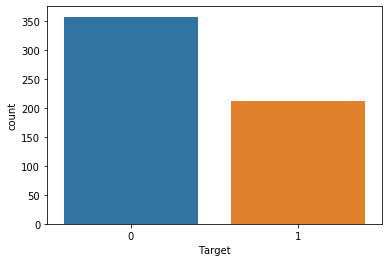

In [14]:
import seaborn as sns
sns.countplot(x='Target',data = data)

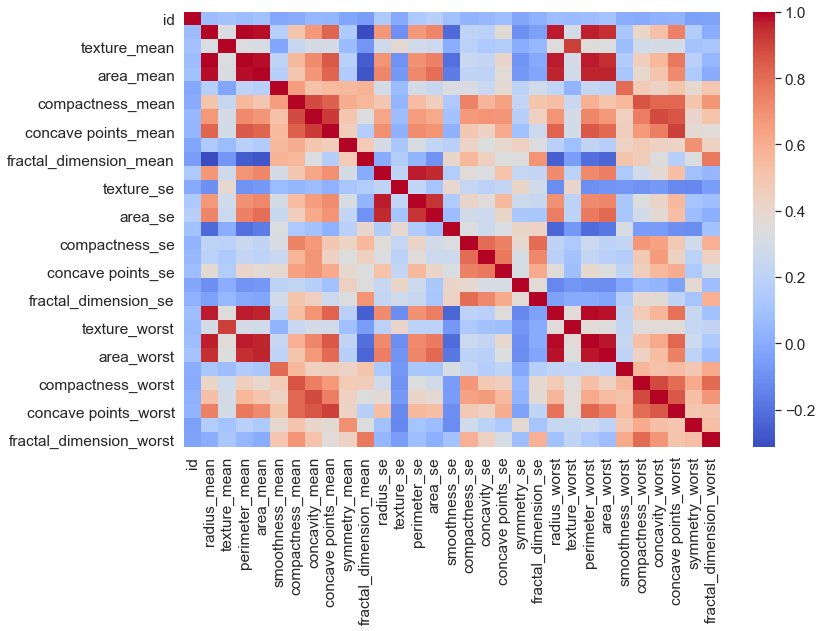

In [15]:
plt.rcParams['figure.figsize']=(12,8)
sns.set(font_scale=1.4)
sns.heatmap(data.drop('Target',axis=1).corr(),cmap='coolwarm')


In [16]:
yes = data.loc[data['Target']==0, 'Target'].count()
no = data.loc[data['Target']==1, 'Target'].count()
percentage = yes / data.shape[0] *100
percentage2 = no / data.shape[0] *100
print('Benign: ', percentage)
print('Malignant: ', percentage2)

Benign:  62.741652021089635
Malignant:  37.258347978910365


Splitting the data and train and test data

In [17]:
y= data['Target']
X = data.drop(columns =['Target'])

In [24]:
from sklearn.model_selection import train_test_split
X_Train, X_test, y_Train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [25]:
print("Original X: ", data.shape)
print("X_Train: ", X_train.shape)
print("X_Test: ", X_test.shape)
print("Y_Train: ", y_train.shape)
print("Y_Test: ", y_test.shape)

Original X:  (569, 32)
X_Train:  (455, 31)
X_Test:  (114, 31)
Y_Train:  (455,)
Y_Test:  (114,)


In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression

In [27]:
accs = {}
f1s = {}
mccs = {}
cms = {}
aucs = {}

In [31]:
skf = StratifiedKFold(n_splits=5)
accs['LR'] = []
f1s['LR'] = []
mccs['LR'] = []
cms['LR'] = []
aucs['LR'] = []

for trainIndex, testIndex in skf.split(X_Train, y_Train):
    xTrain, xTest = X_Train.iloc[trainIndex], X_Train.iloc[testIndex]
    yTrain, yTest = y_Train.iloc[trainIndex], y_Train.iloc[testIndex]
    
    # Oversampling using SMOTE
    
    clf = LogisticRegression(solver='lbfgs', max_iter=1000)
    clf.fit(xTrain, yTrain)  
    yPred = clf.predict(xTest)
    yProb = clf.predict_proba(xTest)[:,1]
    
    # All Scores
    accs['LR'].append(accuracy_score(yTest, yPred))
    f1s['LR'].append(f1_score(yTest, yPred))
    mccs['LR'].append(matthews_corrcoef(yTest, yPred))
    cms['LR'].append(confusion_matrix(yTest,yPred))
    aucs['LR'].append(roc_auc_score(yTest,yProb))
    
print("Mean Accuracy                        : ", np.mean(accs['LR']))
print("Mean F1-Score                        : ", np.mean(f1s['LR']))
print("Mean Matthews Correlation Coefficient: ", np.mean(mccs['LR']))
print("Mean Confusion Matrices              : ", np.mean(cms['LR']))
print("Mean ROC-AUC Score                   : ", np.mean(aucs['LR']))


Mean Accuracy                        :  0.5758241758241758
Mean F1-Score                        :  0.10880000000000001
Mean Matthews Correlation Coefficient:  0.0
Mean Confusion Matrices              :  22.75
Mean ROC-AUC Score                   :  0.51671826625387


C:\Users\shast\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\shast\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\shast\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\shast\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\shast\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sq

In [70]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(X_train, y_train)
Y_pred1 = classifier1.predict(X_test)
cm1 = confusion_matrix(y_test, Y_pred1)
acc1 = accuracy_score(y_test, Y_pred1)
print("Accuracy score using Logistic Regression:", acc1*100)

Accuracy score using Logistic Regression: 98.24561403508771


C:\Users\shast\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### K-Nearest Neighbor

In [71]:
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier2.fit(X_train, y_train)
Y_pred2 = classifier2.predict(X_test)
cm2 = confusion_matrix(y_test, Y_pred2)
acc2 = accuracy_score(y_test, Y_pred2)
print("Accuracy score using K-Nearest Neighbor:", acc2*100)

Accuracy score using K-Nearest Neighbor: 94.73684210526315


### Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier
classifier3 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier3.fit(X_train, y_train)
Y_pred3 = classifier3.predict(X_test)
cm3 = confusion_matrix(y_test, Y_pred3)
acc3 = accuracy_score(y_test, Y_pred3)
print("Accuracy score using Decision Tree:", acc3*100)

Accuracy score using Decision Tree: 93.85964912280701


### Random forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
classifier4 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier4.fit(X_train, y_train)
Y_pred4 = classifier4.predict(X_test)
cm4 = confusion_matrix(y_test, Y_pred4)
acc4 = accuracy_score(y_test, Y_pred4)
print("Accuracy score using Random Forest:", acc4*100)

Accuracy score using Random Forest: 94.73684210526315
